In [223]:
import numpy as np
import pandas as pd
import matplotlib as mtp
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [375]:
#Importing the data set
data = pd.read_csv('dataset.csv')
data = data.drop('id', axis= 1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [226]:
#Here I am simply seeing what the names of all the columns are. 
feature_names = list(data.columns)
print(feature_names)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'points_se', 'symmetry_se', 'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst']


## Data Analysis

In [227]:
#First I am going to examine the Diagnosis column. I would like to see how many benign or malignant. 
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

From this we can see that there are more benign diagnosis then their are malignant. This could play a factor when training the data as there may be more benign diagnosis in the training data. 

In [228]:
#Here we are looking at the means of all the columns with respect to benign and malignent diagnosis. 
#This will help us compare the measurements for the two diagnosis. 
mean_data = data.groupby('diagnosis', as_index = False).mean()
mean_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


We can see again from the performance of variance analysis that there is a larger varaince in the column data for malignant diagnosis when compared to that of the benign diagnosis. The only ones that are not larger are texture mean and smoothness mean. 

In [229]:
#Next I am going to get some common statistics for each column of the dataset. We can ignore the column for id.  
data.describe() #This displays all the information for the dataset. 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

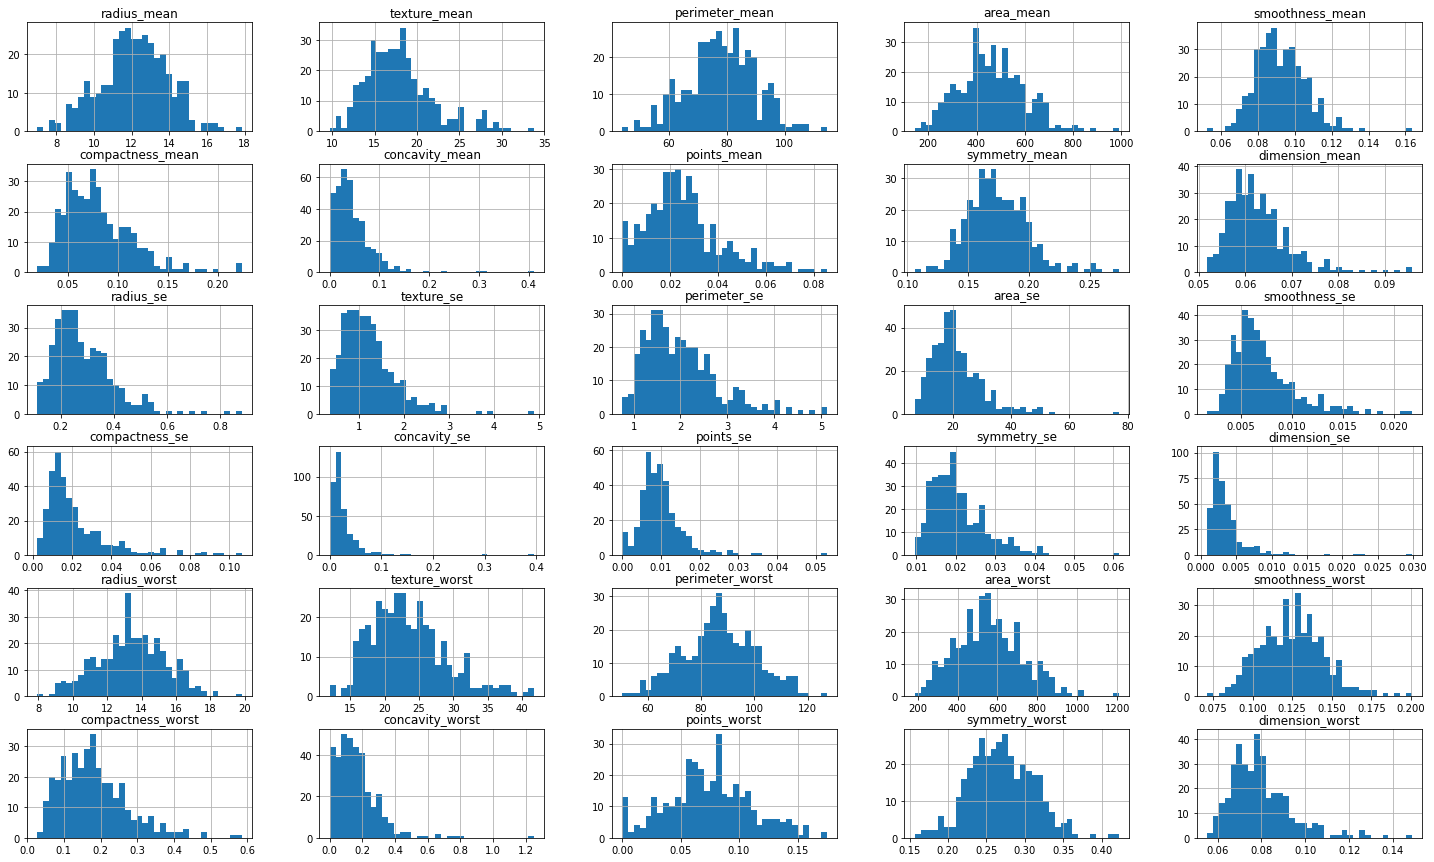

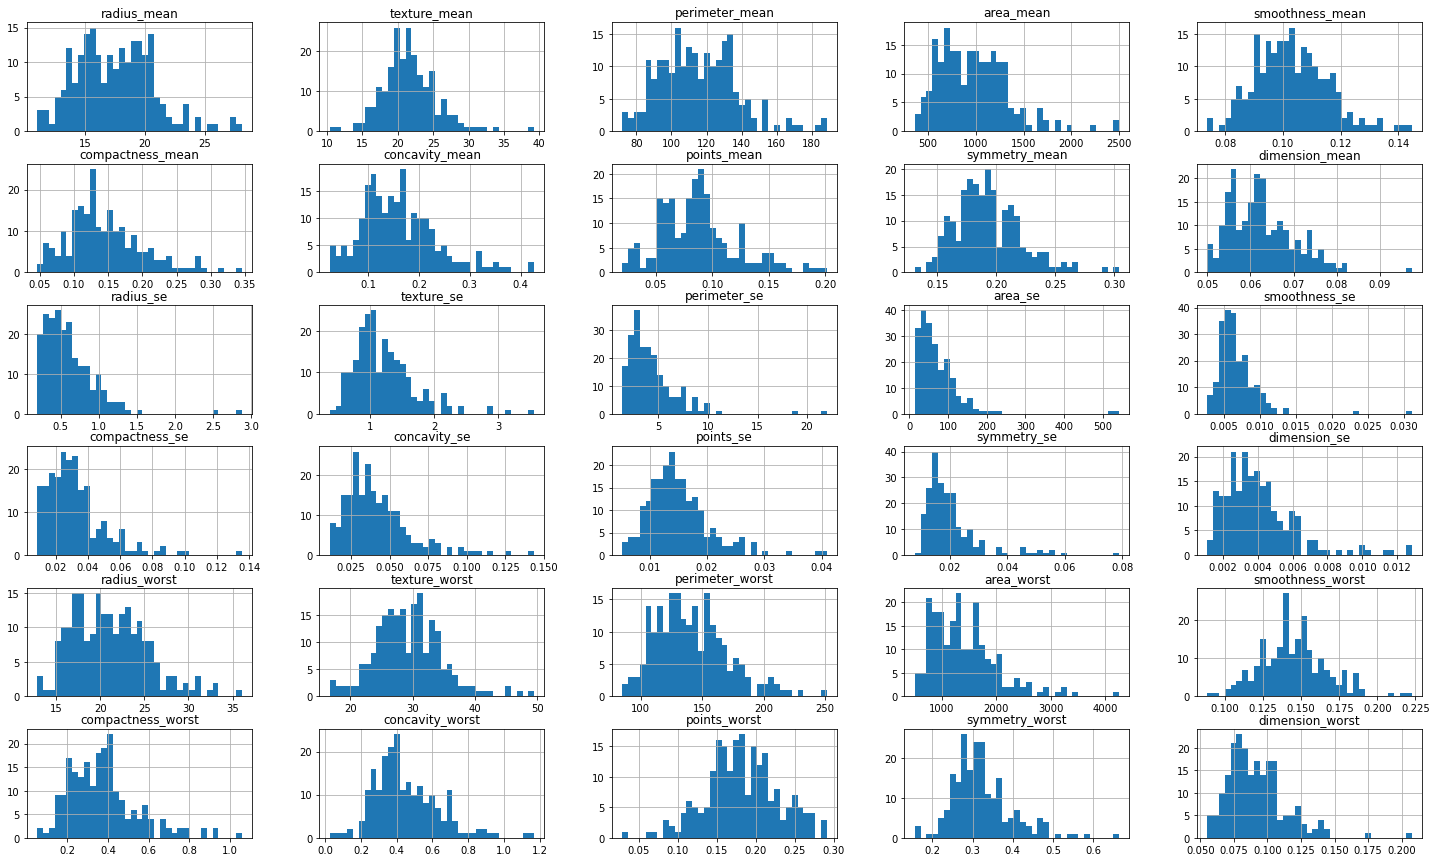

In [230]:
#Now lets see graphicals of the distribution for all columns. 
diagnosis_seperate = data.groupby('diagnosis', as_index = True)
histogams = diagnosis_seperate.hist(bins = 35, figsize = (25,15))
plt.tight_layout

The above histgrams are seperated into Benign and malignant diagnosis. The first group of graphs is bengin and the second group is malignant. It is now possible to see the distribution of the data for each column.


<ipython-input-231-9a7219a21375>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


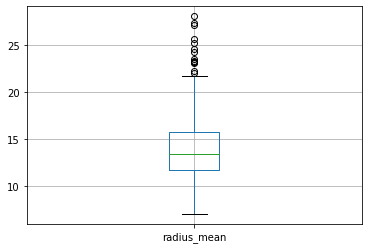

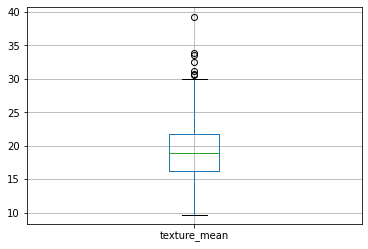

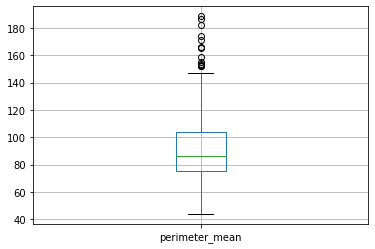

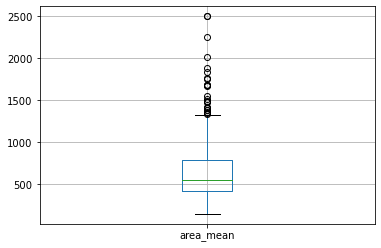

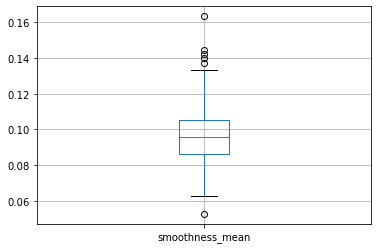

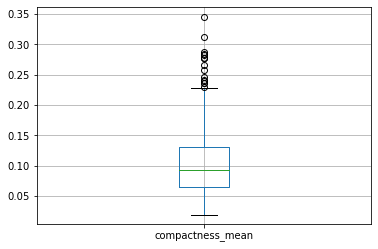

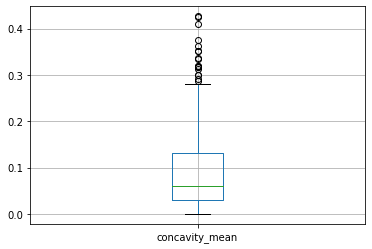

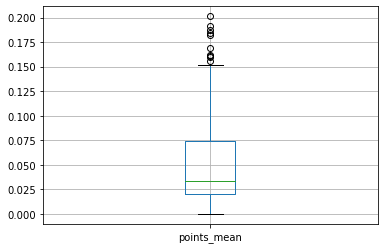

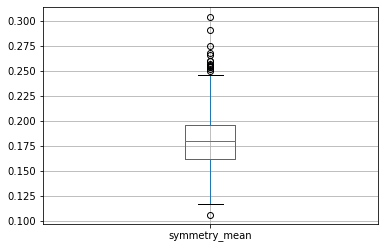

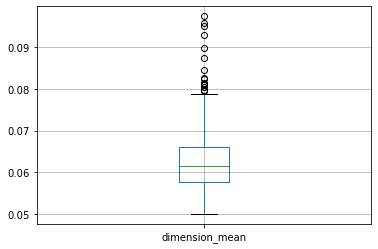

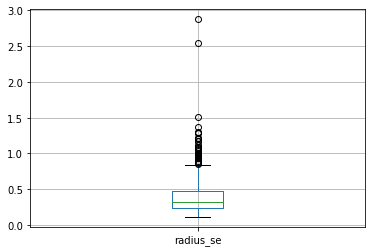

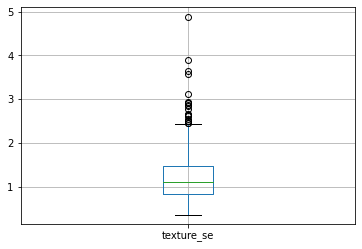

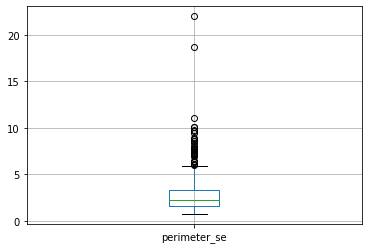

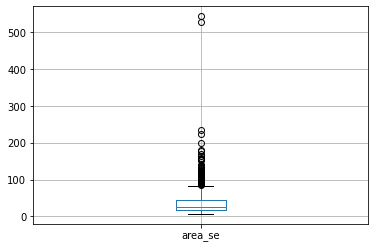

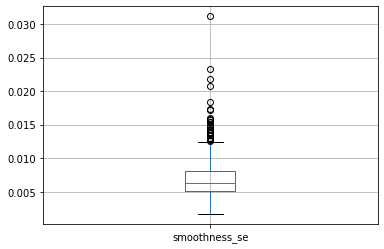

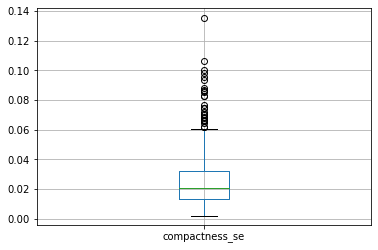

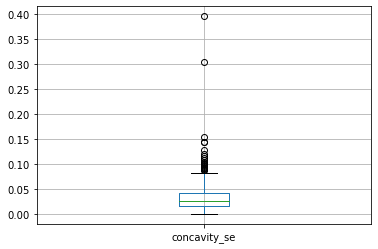

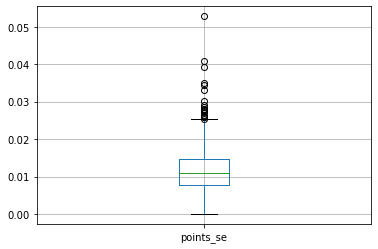

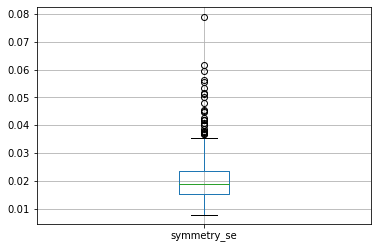

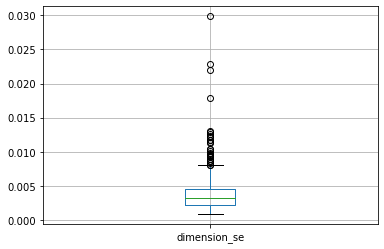

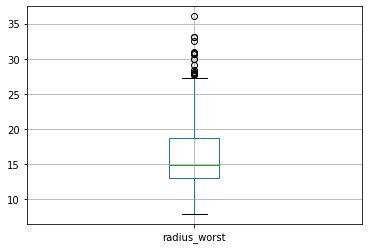

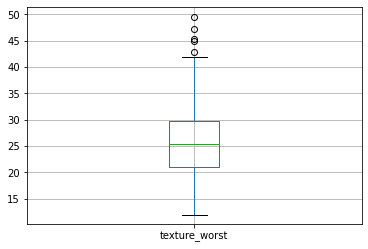

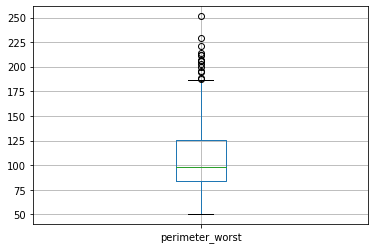

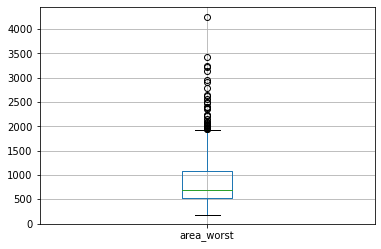

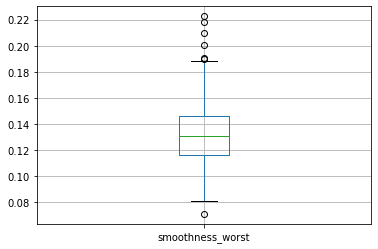

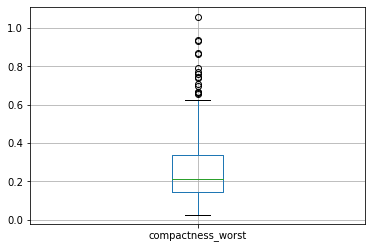

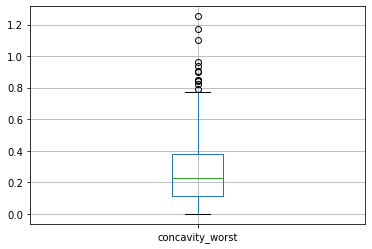

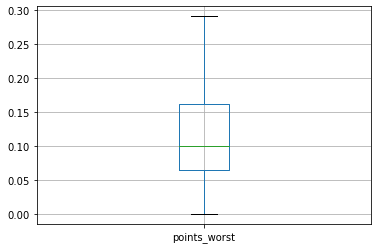

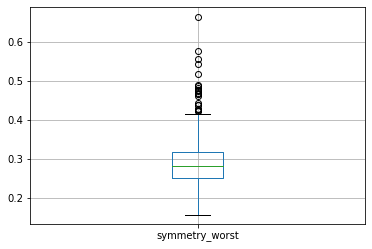

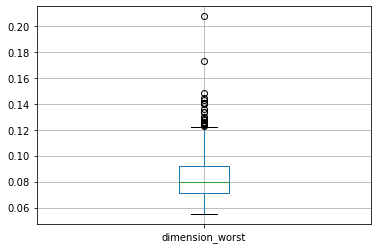

In [231]:
#Here I am going to make a boxplot for all the columns individually. This will allow me to see if there are any outliers. 
data1 = data.select_dtypes(exclude=['object'])
for column in data1:
    plt.figure()
    data1.boxplot([column])

From examining the boxplots there appears to be outliers present in the data. However, due to the fact that the data set is so large the outliers will not impact the data. Further, the outliers may be due to the fact that there are both bengin and malignant diagnosis in the same boxplot. 

In [232]:
#Now im going to use Interquartile range to see if there truly are outliers.
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

radius_mean            4.080000
texture_mean           5.630000
perimeter_mean        28.930000
area_mean            362.400000
smoothness_mean        0.018930
compactness_mean       0.065480
concavity_mean         0.101140
points_mean            0.053690
symmetry_mean          0.033800
dimension_mean         0.008420
radius_se              0.246500
texture_se             0.640100
perimeter_se           1.751000
area_se               27.340000
smoothness_se          0.002977
compactness_se         0.019370
concavity_se           0.026960
points_se              0.007072
symmetry_se            0.008320
dimension_se           0.002310
radius_worst           5.780000
texture_worst          8.640000
perimeter_worst       41.290000
area_worst           568.700000
smoothness_worst       0.029400
compactness_worst      0.191900
concavity_worst        0.268400
points_worst           0.096470
symmetry_worst         0.067500
dimension_worst        0.020620
dtype: float64


In [294]:
#Here I am going to check to see if there are any missing values for the data set in each row.
print(data.isnull().sum())

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64


## Insights 

- Based off the charts and the data it is seen that the malignant diagnosis tumors have a larger average then the Benign tumors. This could be because the Malignant tumours are cancerous which could cause an increase in a majority of the test. 
- From the histograms and the boxplots there appears to be some outliers in the data. This could impact the accuracy of the models however the data set is larger so it may not be a problem. 
- As well, it appears that the standard errors for all the measurements is also larger for malignant then the benign. This means that there is a larger spread in the means in the malignant group then there is in the benign group. This could mean that there is more variation in the tumour properties for patients with malignant tumours then those with benign. 

## Cross Validation

In [381]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [382]:
data['diagnosis'] = data['diagnosis'].map({'B':1,'M':0})

In [383]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('RF',  RandomForestClassifier(n_estimators=100)))

In [384]:
X = data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean', 
         'points_mean', 'symmetry_mean','dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se',
         'compactness_se','concavity_se','points_se','symmetry_se','dimension_se','symmetry_mean','radius_worst','texture_worst',
         'perimeter_worst','area_worst','smoothness_worst','compactness_worst' ,'concavity_worst','points_worst' ,'symmetry_worst' ,
'dimension_worst']].values
y = data['diagnosis'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 34)

In [385]:
#Here is a simple cross validation check between the three models. We can see their printed f1 accuracy scores below. 
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.944444
1   DT  0.943925
2   RF  0.976526


In [386]:
#Stratified k fold. This is a different form of cross validation. Again we get similar results to the above cross validation.
strat_k_fold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 32)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.929605
1   DT  0.922619
2   RF  0.961247


From performing the cross validation. We can see that the random forest seems to have the highest accuracy out of the three test. This means that we will choose the random forest for the predictions. 

## Decision Tree

In [387]:
#Let first perform a decision tree so we can compare the accuracy of the random forest to it. 
data.shape

(569, 31)

In [388]:
X = data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean', 'points_mean', 'symmetry_mean','dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','points_se','symmetry_se','dimension_se','symmetry_mean','radius_worst',
         'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst' ,'concavity_worst','points_worst' ,'symmetry_worst' ,'dimension_worst']].values
y = data['diagnosis']



#### Model Training

In [248]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size = 0.3, random_state = 32)


In [249]:
Decision_tree = DecisionTreeClassifier(criterion="entropy")

Decision_tree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy')

#### Prediction 

In [250]:
Prediction_Tree = Decision_tree.predict(X_testset)

In [251]:
#The predicitions have now been made using the decision tree. We can compare the predicitons with the actual values below. 
print(Prediction_Tree[0:10])
print(y_testset[0:10])
#From the 10 printed predicitons and test set we can see that they are accurate with the predicitions meaning the model was trained.

[1 1 1 1 1 1 1 0 0 1]
216    1
440    1
270    1
16     1
483    1
453    1
447    1
144    0
209    0
17     1
Name: diagnosis, dtype: int64


In [252]:
print("Accuracy of Decision Tree is: ", metrics.accuracy_score(y_testset, Prediction_Tree))

Accuracy of Decision Tree is:  0.9298245614035088


We can see that the decision tree has a pretty high accuracy level with 0.93 or 93%. We will now compare it to the Random forest model. 


## Random Forest

In [389]:
X = data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean', 'points_mean', 'symmetry_mean','dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','points_se','symmetry_se','dimension_se','symmetry_mean','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst' ,'concavity_worst','points_worst' ,'symmetry_worst' ,'dimension_worst']].values
y = data['diagnosis'].values

In [390]:
#Now we are going to split the data 70:30 for training the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [391]:
#Here I am going to see what the shape of the test data and the training data is for both the x and y values. 
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',y_train.shape)
print('Shape of Y_test=>',y_test.shape)

Shape of X_train=> (398, 31)
Shape of X_test=> (171, 31)
Shape of Y_train=> (398,)
Shape of Y_test=> (171,)


In [392]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

random_forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 32)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=32)

In [393]:
#Evaluating on Training set. This should be 1 since we are using the training data and testing with the training data. 
random_forest_pred_train = random_forest.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,random_forest_pred_train))

Training Set Evaluation F1-Score=> 1.0


#### Evaluation of Test Set

In [394]:
random_forest_pred_test = random_forest.predict(X_test)
print('Testing Set accuracy=>',metrics.accuracy_score(y_test,random_forest_pred_test))

Testing Set accuracy=> 0.9415204678362573


Here we can see that the model performs with an accuracy level of 0.94 or 94%. This is slightly larger then that of the decision tree. 

### Random Forest Hyperparameter Evaluation (Larger n_estimator and maximum depth)

In [395]:
X = data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean', 'points_mean', 'symmetry_mean','dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','points_se','symmetry_se','dimension_se','symmetry_mean','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst' ,'concavity_worst','points_worst' ,'symmetry_worst' ,'dimension_worst']].values
y = data['diagnosis'].values

In [396]:
#Now we are going to split the data 70:30 for training the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [397]:
#Here I am going to see what the shape of the test data and the training data is for both the x and y values. 
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',y_train.shape)
print('Shape of Y_test=>',y_test.shape)

Shape of X_train=> (398, 31)
Shape of X_test=> (171, 31)
Shape of Y_train=> (398,)
Shape of Y_test=> (171,)


In [398]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

#Here I am going to change two things to see if it improve the accuracy. I will change the n_estimators to a larger number,
#and I am going to change the max_depth to a smaller number. 
random_forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 150, max_depth = 25, random_state = 30)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=150,
                       random_state=30)

In [399]:
#Evaluating on Training set. This should be 1 since we are using the training data and testing with the training data. 
random_forest_pred_train = random_forest.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,random_forest_pred_train))

Training Set Evaluation F1-Score=> 1.0


#### Evaluation of Test Set

In [400]:
random_forest_pred_test = random_forest.predict(X_test)
print('Testing Set accuracy=>',metrics.accuracy_score(y_test,random_forest_pred_test))

Testing Set accuracy=> 0.9473684210526315


This slightly increased the accuracy from 0.941 to 0.947. This is a slight improvement but still an improvement. We will now try some more modifications 

#### Edits to more parameters (Decrease in n_estimators)

In [401]:
X = data[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean', 'points_mean', 'symmetry_mean','dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','points_se','symmetry_se','dimension_se','symmetry_mean','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst' ,'concavity_worst','points_worst' ,'symmetry_worst' ,'dimension_worst']].values
y = data['diagnosis'].values

In [402]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

In [403]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',y_train.shape)
print('Shape of Y_test=>',y_test.shape)

Shape of X_train=> (398, 31)
Shape of X_test=> (171, 31)
Shape of Y_train=> (398,)
Shape of Y_test=> (171,)


In [404]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

random_forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 80, random_state = 30)
random_forest.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=30)

In [405]:
# Evaluating on Training set
random_forest_pred_train = random_forest.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,random_forest_pred_train))

Training Set Evaluation F1-Score=> 1.0


In [406]:
random_forest_pred_test = random_forest.predict(X_test)
print('Testing Set accuracy=>',metrics.accuracy_score(y_test,random_forest_pred_test))

Testing Set accuracy=> 0.9649122807017544


Here we changed the n_estimators to a smaller number of 80. This actually improved the model accuracy and brought the model to a 97% accuracy. This is the best accuracy so far. 

#### Using GridSearch Recommendation 

In [407]:
#Now we are going to split the data 70:30 for training the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [408]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

#Here I am going to change two things to see if it improve the accuracy. I will change the n_estimators to a larger number,
#and I am going to change the max_depth to a smaller number. As well, I will set oob_score to true.  
random_forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 500, max_depth = 50, max_features = 'auto', random_state = 32)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=500,
                       random_state=32)

In [409]:
random_forest_pred_test = random_forest.predict(X_test)
print('Testing Set accuracy=>',metrics.accuracy_score(y_test,random_forest_pred_test))

Testing Set accuracy=> 0.9473684210526315


Based on the manipulation of various parameters it does not appear that the model will have a higher accuracy then 0.95 or 95%. This is a very good model accuracy all together. 

## Using GridSearch for my model

Here I am going to see which parameters it believes are best for producing the highest accuracy for the model. These will be implemented above to see if they in fact make a difference to the model test score. 

In [322]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

random_forest = RandomForestClassifier(random_state = 32)


In [323]:
param_grid = {
    'n_estimators': [100,500],
    'max_features': ['auto','sqrt','log2'],
    'max_depth' : [10,20,30,40,50],
    'criterion' : ['gini','entropy']
}

In [324]:
CV_random_forest = GridSearchCV(estimator =random_forest, param_grid=param_grid)
CV_random_forest.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=32),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500]})

In [325]:
CV_random_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 500}

## Conclusion 

From performing the cross validation on the model we could see that the model with the highest accuracy was that of the Random Forest. We then created a decision tree to compare to the random forest and this produced an accuracy of 93%. We then created a random forest model that had the standard n_estimators to be equal to 100 and everything else set as default. This produced a model with 94% accuracy. From there we changed some parameters such as n_estimators, max_depth and max_features to see if the model accuracy could be increased. From this we acheived a maximum model accuracy of 95%. A slight 1% increase in model accuracy. Next I tried using n_estimators = 80 and the other parameters were left as default. This produced a 97% accurate model, which is the highest so far. I performed a FridSearch to see which model parameters would be best and this produced a model with accuracy of 95% again. Therefore, it appears that by decreasing the n_estimators to 80 it actually improved the model to 97% accuracy.